#One hot encoded dataset

In [22]:
new_df.head()

returned_NO  returned  returned_PV  ...  age_50_64  age_65_82  age_83_100
0            0         0            1  ...          0          0           0
1            1         0            0  ...          0          0           0
2            1         0            0  ...          0          0           0
3            0         1            0  ...          0          0           0
4            0         1            0  ...          0          0           0

[5 rows x 10 columns]

In [23]:
len(new_df)

123588

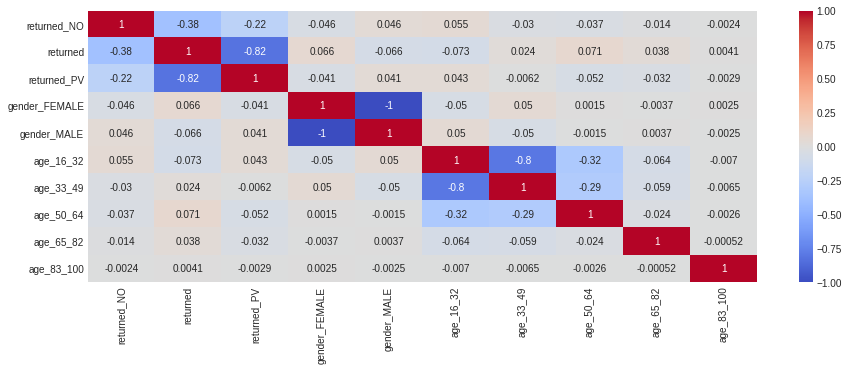

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(new_df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

#Generate faker data


In [26]:
fakies = []

for i in range(len(new_df)):
  if (new_df.iloc[i].gender_MALE==1) and (new_df.iloc[i].age_16_32==1):
      fakies.append(fake.boolean(chance_of_getting_true=85))
  elif (new_df.iloc[i].gender_MALE==1) and (new_df.iloc[i].age_50_64==1):
      fakies.append(fake.boolean(chance_of_getting_true=75))
  elif (new_df.iloc[i].gender_MALE==1) and (new_df.iloc[i].age_33_49==1):
      fakies.append(fake.boolean(chance_of_getting_true=70))
  elif (new_df.iloc[i].gender_MALE==1) and (new_df.iloc[i].age_65_82==1):
      fakies.append(fake.boolean(chance_of_getting_true=65))
  elif (new_df.iloc[i].gender_FEMALE==1) and (new_df.iloc[i].age_16_32==1):
      fakies.append(fake.boolean(chance_of_getting_true=55))
  elif (new_df.iloc[i].gender_FEMALE==1) and (new_df.iloc[i].age_50_64==1):
      fakies.append(fake.boolean(chance_of_getting_true=25))
  elif (new_df.iloc[i].gender_FEMALE==1) and (new_df.iloc[i].age_33_49==1):
      fakies.append(fake.boolean(chance_of_getting_true=40))
  elif (new_df.iloc[i].gender_FEMALE==1) and (new_df.iloc[i].age_65_82==1):
      fakies.append(fake.boolean(chance_of_getting_true=45))
  else:
      fakies.append(fake.boolean(chance_of_getting_true=30))

In [28]:
new_df['visitors_family'] = pd.DataFrame(fakies)

In [37]:
new_df.head(5)

returned_NO  returned  returned_PV  ...  age_65_82  age_83_100  visitors_family
0            0         0            1  ...          0           0             True
1            1         0            0  ...          0           0             True
2            1         0            0  ...          0           0             True
3            0         1            0  ...          0           0            False
4            0         1            0  ...          0           0             True

[5 rows x 11 columns]

In [38]:
# One hot encoding

df_visitors_family_one_hot = pd.get_dummies(new_df['visitors_family'], 
                                     prefix='fam')

In [39]:
df_visitors_family_one_hot.head(5)

fam_False  fam_True
0          0         1
1          0         1
2          0         1
3          1         0
4          0         1

In [40]:
# Combine the one hot encoding with new_df
new_df_con_enc = pd.concat([new_df,
                            df_visitors_family_one_hot], axis=1)

In [41]:
new_df_con_enc.head(5)

returned_NO  returned  returned_PV  ...  visitors_family  fam_False  fam_True
0            0         0            1  ...             True          0         1
1            1         0            0  ...             True          0         1
2            1         0            0  ...             True          0         1
3            0         1            0  ...            False          1         0
4            0         1            0  ...             True          0         1

[5 rows x 13 columns]

In [42]:
final_df = new_df_con_enc.drop(['visitors_family'], axis=1)

In [43]:
final_df.head(5)

returned_NO  returned  returned_PV  ...  age_83_100  fam_False  fam_True
0            0         0            1  ...           0          0         1
1            1         0            0  ...           0          0         1
2            1         0            0  ...           0          0         1
3            0         1            0  ...           0          1         0
4            0         1            0  ...           0          0         1

[5 rows x 12 columns]

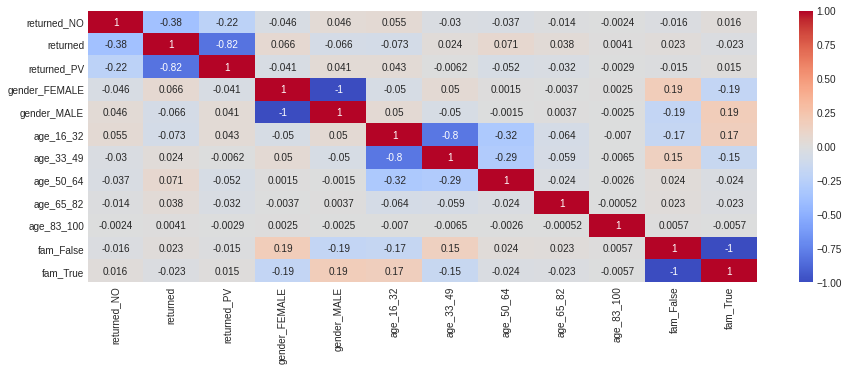

In [44]:
plt.figure(figsize=(15,5))
sns.heatmap(final_df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);